In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd
from scipy import signal as sn
plt.style.use('ggplot')



videos=['videos/20250528_170906-003.mp4','videos/20250528_173138.mp4','videos/20250528_173920.mp4','videos/20250528_175822.mp4',
       'videos/C1862.MP4','videos/C1871.MP4','videos/C1872.MP4','videos/C1873.MP4','videos/C1883.MP4','videos/C1888.MP4','videos/C1889.MP4',
       'videos/C1896.MP4','videos/C1897.MP4','videos/C1899.MP4','videos/C1906.MP4','videos/C1907.MP4',
       'videos/C1910.MP4','videos/C1915.MP4','videos/C1917.MP4','videos/C1918.MP4','videos/C1923.MP4',
       'videos/C1926.MP4','videos/C1928.MP4','videos/C1929.MP4','videos/C1932.MP4','videos/C1933.MP4','videos/C1934.MP4']
paths=[f"frames_video{i+1}/*" for i in range(len(videos))]


In [58]:
path_list=glob.glob(paths[9])
img = cv.imread(path_list[152],cv.IMREAD_COLOR_RGB)
img = img[415:1423,1845:2848]

In [ ]:

p1 = path_list[152]
p2 = path_list[5838]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[415:1423,1845:2848]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[415:1423,1845:2848]

print(img1.dtype)

In [ ]:
delta = (img1 - img2).astype(np.float64)
delta = delta


In [ ]:
# plt.imshow(img1)
# plt.figure()
# plt.imshow(img2)
# plt.figure()
plt.imshow(delta)

In [ ]:
threshold = 200
arr_new = np.where(delta > threshold, 0, delta)

plt.imshow(arr_new)


In [ ]:
arr_new

In [ ]:
arr_new2 = np.where(arr_new > 30, 255, arr_new)
# arr_new2 = np.where(arr_new < 30, 0, arr_new)
arr_new2[arr_new2 < 30] = 0
# plt.figure(figsize=(16*2,9*2))
plt.imshow(arr_new2)

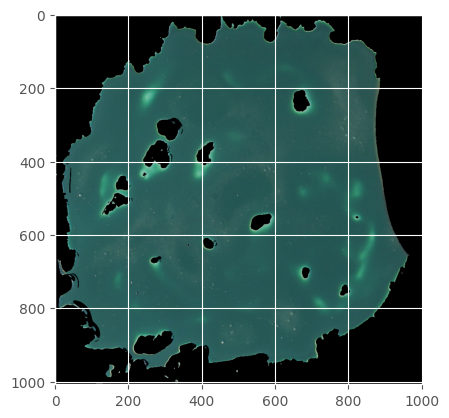

In [73]:
mask = (arr_new2 == 255)
img = cv.imread(path_list[-1],cv.IMREAD_COLOR_RGB)
img = img[415:1423,1845:2848]

output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]            # Copiar solo donde mask es True

plt.imshow(output)

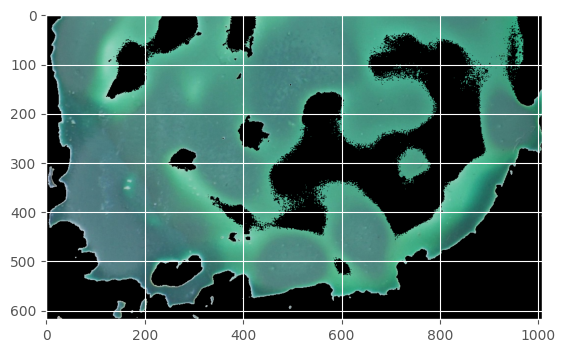

In [96]:
path_list=glob.glob(paths[10])

p1 = path_list[876]
p2 = path_list[2991]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[738:1356 , 1838:2846]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[738:1356 , 1838:2846]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

i = path_list[993]

img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[738:1356 , 1838:2846]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video12/*


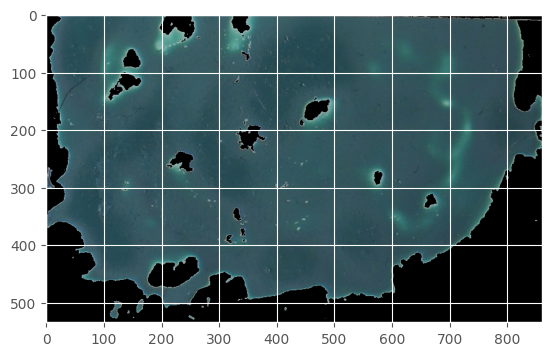

In [7]:
path_list=glob.glob(paths[11])
print(paths[11])
p1 = path_list[0]
p2 = path_list[4949]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1077:1611 , 1463:2324]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1077:1611 , 1463:2324]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

i = path_list[993]

img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1077:1611 , 1463:2324]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video13/*
6461


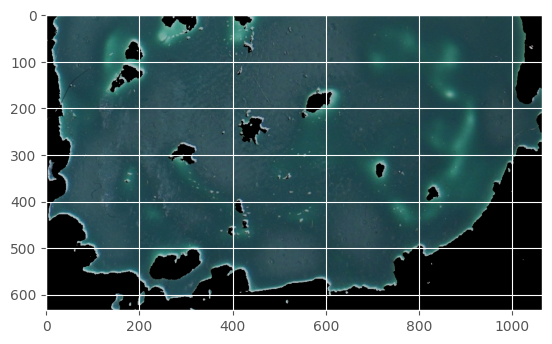

In [6]:
k=12
#DERIVA
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[0]
p2 = path_list[2025]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1134:1768 , 1404:2469]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1134:1768 , 1404:2469]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1134:1768 , 1404:2469]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video14/*


C:\Users\soysa\AppData\Local\Temp\ipykernel_12428\2171097123.py:21: DeprecationWarning: This function is deprecated. Please call randint(0, 7404 + 1) instead
  i = path_list[np.random.random_integers(0,len(path_list))]


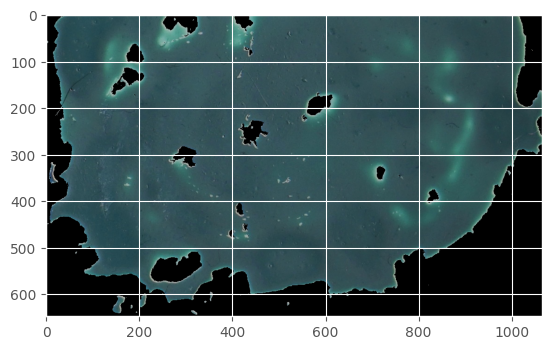

In [ ]:
k=13
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[7403]
p2 = path_list[2100]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1123:1771 , 1406:2472]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1123:1771 , 1406:2472]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

i = path_list[np.random.random_integers(0,len(path_list))]
print(i)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1123:1771 , 1406:2472]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video15/*
5267


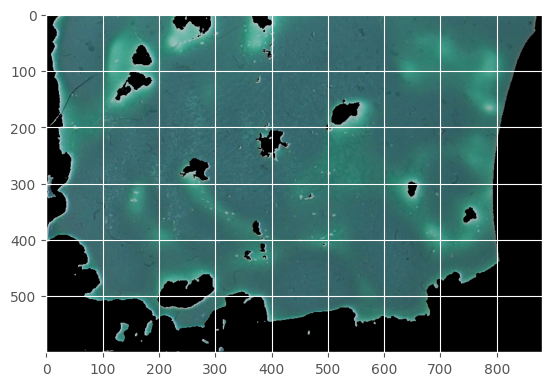

In [34]:
k=14
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[0]
p2 = path_list[1950]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1130:1730 , 1485:2366]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1130:1730 , 1485:2366]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1130:1730 , 1485:2366]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video16/*
10769


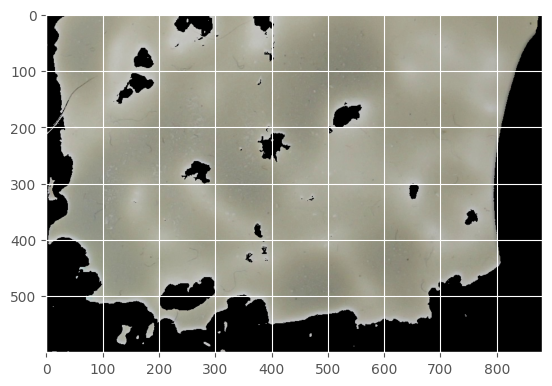

In [39]:
k=15
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[0]
p2 = path_list[2150]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1130:1730 , 1485:2366]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1130:1730 , 1485:2366]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1130:1730 , 1485:2366]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video17/*
5455


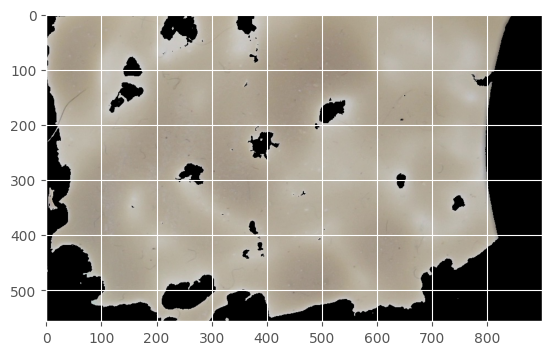

In [45]:
k=16
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[0]
p2 = path_list[7557]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1214:1771 , 1332:2232]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1214:1771 , 1332:2232]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1214:1771 , 1332:2232]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video18/*
1573


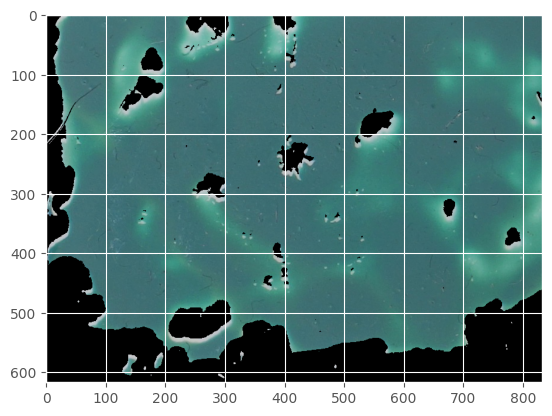

In [12]:
k=17
#DERIVA
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[0]
p2 = path_list[5450]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1171:1788 , 1248:2081]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1171:1788 , 1248:2081]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1171:1788 , 1248:2081]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video19/*
16603


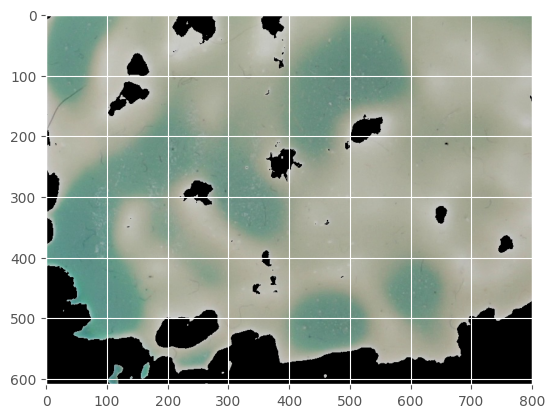

In [4]:
k=18
#deriva a la derecha al principio
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[19619]
p2 = path_list[14525]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1195:1804 , 1296:2097]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1195:1804 , 1296:2097]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1195:1804 , 1296:2097]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video20/*
9569


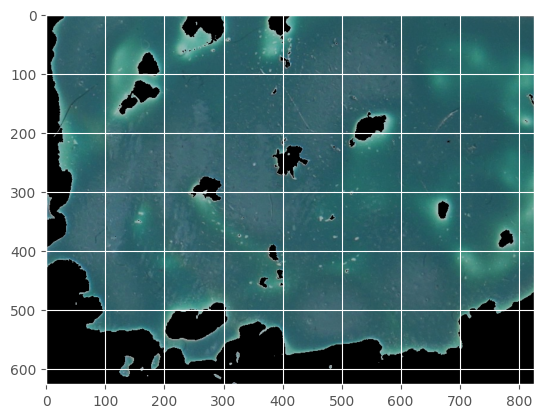

In [ ]:
k=19
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
p1 = path_list[7750]
p2 = path_list[21750]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1193:1819 , 1274:2100]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1193:1819 , 1274:2100]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1193:1819 , 1274:2100]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video22/*
18298


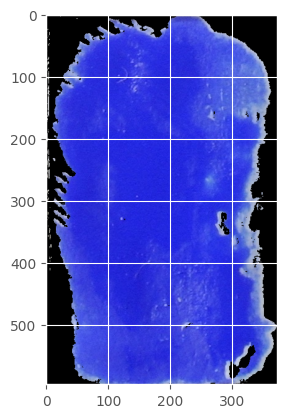

In [ ]:
k=21
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[36383]
p2 = path_list[27550]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1168:1764 , 2285:2657]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1168:1764 , 2285:2657]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1168:1764 , 2285:2657]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video23/*
8070


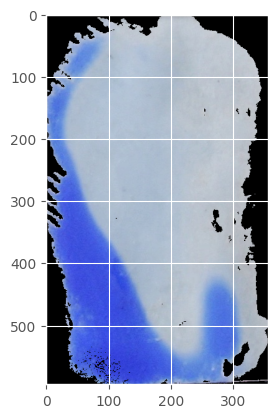

In [ ]:
k=22
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[23387]
p2 = path_list[16975]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1279:1874 , 2378:2736]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1279:1874 , 2378:2736]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1279:1874 , 2378:2736]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video24/*
1280


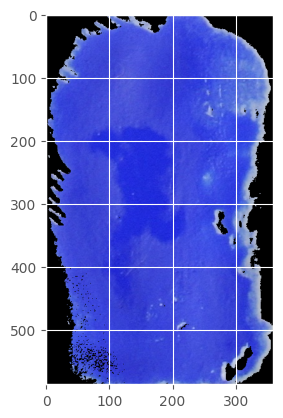

In [12]:
k=23
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[19883]
p2 = path_list[14650]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1277:1863 , 2349:2709]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1277:1863 , 2349:2709]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1277:1863 , 2349:2709]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video25/*
10556


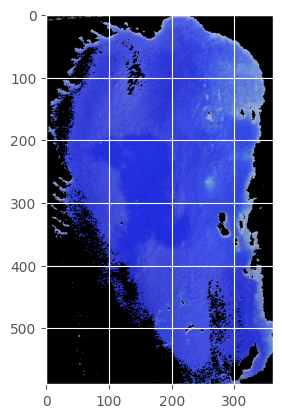

In [17]:
k=24
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[349*25]
p2 = path_list[435*25]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1273:1863 , 2412:2774]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1273:1863 , 2412:2774]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1273:1863 , 2412:2774]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video26/*
13371


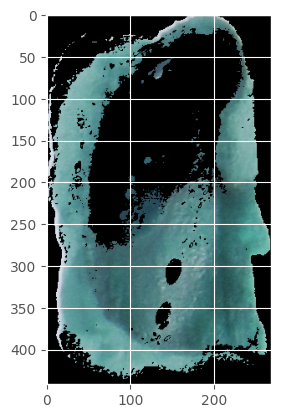

In [24]:
k=25
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[0]
p2 = path_list[437*25]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1341:1783 , 2444:2713]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1341:1783 , 2444:2713]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1341:1783 , 2444:2713]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)

frames_video27/*
10300


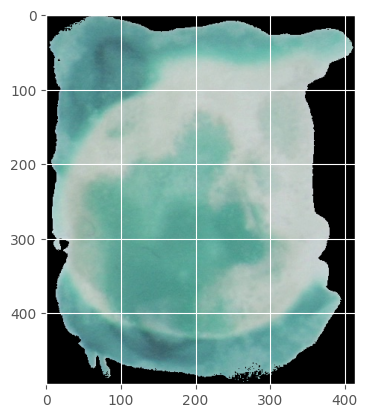

In [25]:
k=26
#DERIVA al principio y al final
path_list=glob.glob(paths[k])
print(paths[k])
 
p1 = path_list[711*25]
p2 = path_list[577*25]

img1 = cv.imread(p1,cv.IMREAD_GRAYSCALE)
img1 = img1[1348:1844 , 2447:2861]

img2= cv.imread(p2,cv.IMREAD_GRAYSCALE)
img2 = img2[1348:1844 , 2447:2861]

delta = (img1 - img2).astype(np.float64)

arr_new = np.where(delta > 235, 0, delta)       #si soy completamente sincero varias de estas ultimas 
arr_new2 = np.where(arr_new > 30, 255, arr_new) #lineas fueron random bullshit go, ni tengo idea de 
arr_new2[arr_new2 < 30] = 0                     #si esto hace algo o no
mask = (arr_new2 == 255)
size = np.sum(mask)

nrorandom=np.random.randint(0,len(path_list))
i = path_list[nrorandom]
print(nrorandom)
img = cv.imread(i,cv.IMREAD_COLOR_RGB)
# img = cv.cvtColor(img, cv.COLOR_RGB2LAB) 
img = img[1348:1844 , 2447:2861]
L_in,a_in,b_in=0,0,0
output = np.zeros_like(img)         # Todo negro
output[mask] = img[mask]    

plt.imshow(output)